In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px

In [2]:
#UTF-16, EUC-KR, CP949 
data_ = pd.read_csv('./resampled_data_final.csv',encoding='EUC-KR')
data_.head()

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매
0,2000-01-31,0.92,0.07,27.26,4.00,1636.00,100.00,-0.19,0.58,112.00,5.45,337504.00,4666.20,288400.00,86.22,91.43,268044.00
1,2000-02-29,0.64,-0.11,29.37,4.10,1737.00,100.57,-0.20,0.59,111.30,5.73,337504.00,4679.40,293750.00,86.42,91.74,272020.00
2,2000-03-31,0.15,-0.47,29.84,4.00,1604.00,101.47,-0.13,0.61,107.10,5.85,370003.00,4710.20,274750.00,86.85,92.09,275192.00
3,2000-04-30,0.41,-0.45,25.72,3.80,1626.00,102.54,-0.04,0.62,109.20,6.02,336901.00,4766.10,271600.00,87.19,92.68,271046.00
4,2000-05-31,0.66,-0.40,28.79,4.00,1575.00,103.70,0.02,0.63,110.70,6.27,344615.00,4753.90,282250.00,87.38,92.94,271394.00


In [3]:
data_ = data_.dropna()
data_.tail()

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매
282,2023-07-31,-1.58,-0.91,76.07,3.50,1451.00,310.15,-0.29,-0.61,71.50,5.12,553738.00,20863.70,232400.00,138.67,103.19,694415.00
283,2023-08-31,-1.47,-0.76,81.39,3.80,1305.00,311.52,-0.34,-0.58,69.40,5.33,604203.00,20825.50,237750.00,138.80,103.24,699540.00
284,2023-09-30,-0.96,-0.44,89.42,3.80,1356.00,312.42,-0.36,-0.55,67.90,5.33,613485.00,20755.30,210800.00,139.21,103.33,705304.00
285,2023-10-31,-0.71,-0.19,85.64,3.80,1376.00,312.95,-0.34,-0.53,63.80,5.33,584976.00,20725.60,210750.00,139.38,102.46,703528.00
286,2023-11-30,-1.08,-0.36,77.69,3.70,1525.00,312.95,-0.39,-0.51,61.30,5.33,579283.00,20767.40,220250.00,139.81,102.43,705981.00


In [106]:
data_.isna().sum()

DATE                0
장단기10년물국채/3개월금리차    0
장단기10년물국채/2년물금리차    0
국제유가                0
실업률                 0
신규주택착공건수            0
주택가격지수              0
금융상태지수              0
금융상태지수레버리지          0
소비자감성지수             0
기준금리                0
제조업신규주문             0
M2통화량               0
신규실업수당청구            0
경기동행종합              0
산업생산지수              0
소매판매                0
dtype: int64

In [4]:
data_['DATE'] = pd.to_datetime(data_['DATE'])
data_['DATE'].info()

<class 'pandas.core.series.Series'>
Index: 287 entries, 0 to 286
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
287 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.5 KB


In [90]:
# data_ = data_.iloc[:240]

In [5]:
#코로나 시기 제외하고 군집화
data_ = data_[data_['DATE'].dt.year <= 2019]
data_

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매
0,2000-01-31,0.92,0.07,27.26,4.00,1636.00,100.00,-0.19,0.58,112.00,5.45,337504.00,4666.20,288400.00,86.22,91.43,268044.00
1,2000-02-29,0.64,-0.11,29.37,4.10,1737.00,100.57,-0.20,0.59,111.30,5.73,337504.00,4679.40,293750.00,86.42,91.74,272020.00
2,2000-03-31,0.15,-0.47,29.84,4.00,1604.00,101.47,-0.13,0.61,107.10,5.85,370003.00,4710.20,274750.00,86.85,92.09,275192.00
3,2000-04-30,0.41,-0.45,25.72,3.80,1626.00,102.54,-0.04,0.62,109.20,6.02,336901.00,4766.10,271600.00,87.19,92.68,271046.00
4,2000-05-31,0.66,-0.40,28.79,4.00,1575.00,103.70,0.02,0.63,110.70,6.27,344615.00,4753.90,282250.00,87.38,92.94,271394.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2019-08-31,-0.49,0.00,54.81,3.60,1367.00,211.70,-0.54,-0.50,89.80,2.13,475564.00,14914.60,206800.00,127.81,102.78,521011.00
236,2019-09-30,-0.20,0.05,56.95,3.50,1300.00,211.88,-0.51,-0.52,93.20,2.04,469232.00,15008.10,203750.00,128.20,102.53,518121.00
237,2019-10-31,0.15,0.17,53.96,3.60,1332.00,211.97,-0.51,-0.53,95.50,1.83,470324.00,15140.80,211750.00,128.41,101.60,519530.00
238,2019-11-30,0.19,0.17,57.05,3.60,1346.00,212.11,-0.56,-0.52,96.80,1.55,433512.00,15242.20,223400.00,128.67,102.15,523313.00


In [109]:
data_.tail()

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매
235,2019-08-31,-0.49,0.00,54.81,3.60,1367.00,211.70,-0.54,-0.50,89.80,2.13,475564.00,14914.60,206800.00,127.81,102.78,521011.00
236,2019-09-30,-0.20,0.05,56.95,3.50,1300.00,211.88,-0.51,-0.52,93.20,2.04,469232.00,15008.10,203750.00,128.20,102.53,518121.00
237,2019-10-31,0.15,0.17,53.96,3.60,1332.00,211.97,-0.51,-0.53,95.50,1.83,470324.00,15140.80,211750.00,128.41,101.60,519530.00
238,2019-11-30,0.19,0.17,57.05,3.60,1346.00,212.11,-0.56,-0.52,96.80,1.55,433512.00,15242.20,223400.00,128.67,102.15,523313.00
239,2019-12-31,0.37,0.34,59.82,3.60,1551.00,212.24,-0.54,-0.51,99.30,1.55,450364.00,15320.70,235500.00,128.91,101.88,525405.00


In [6]:
#글꼴설정
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔글꼴 경로 설정
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

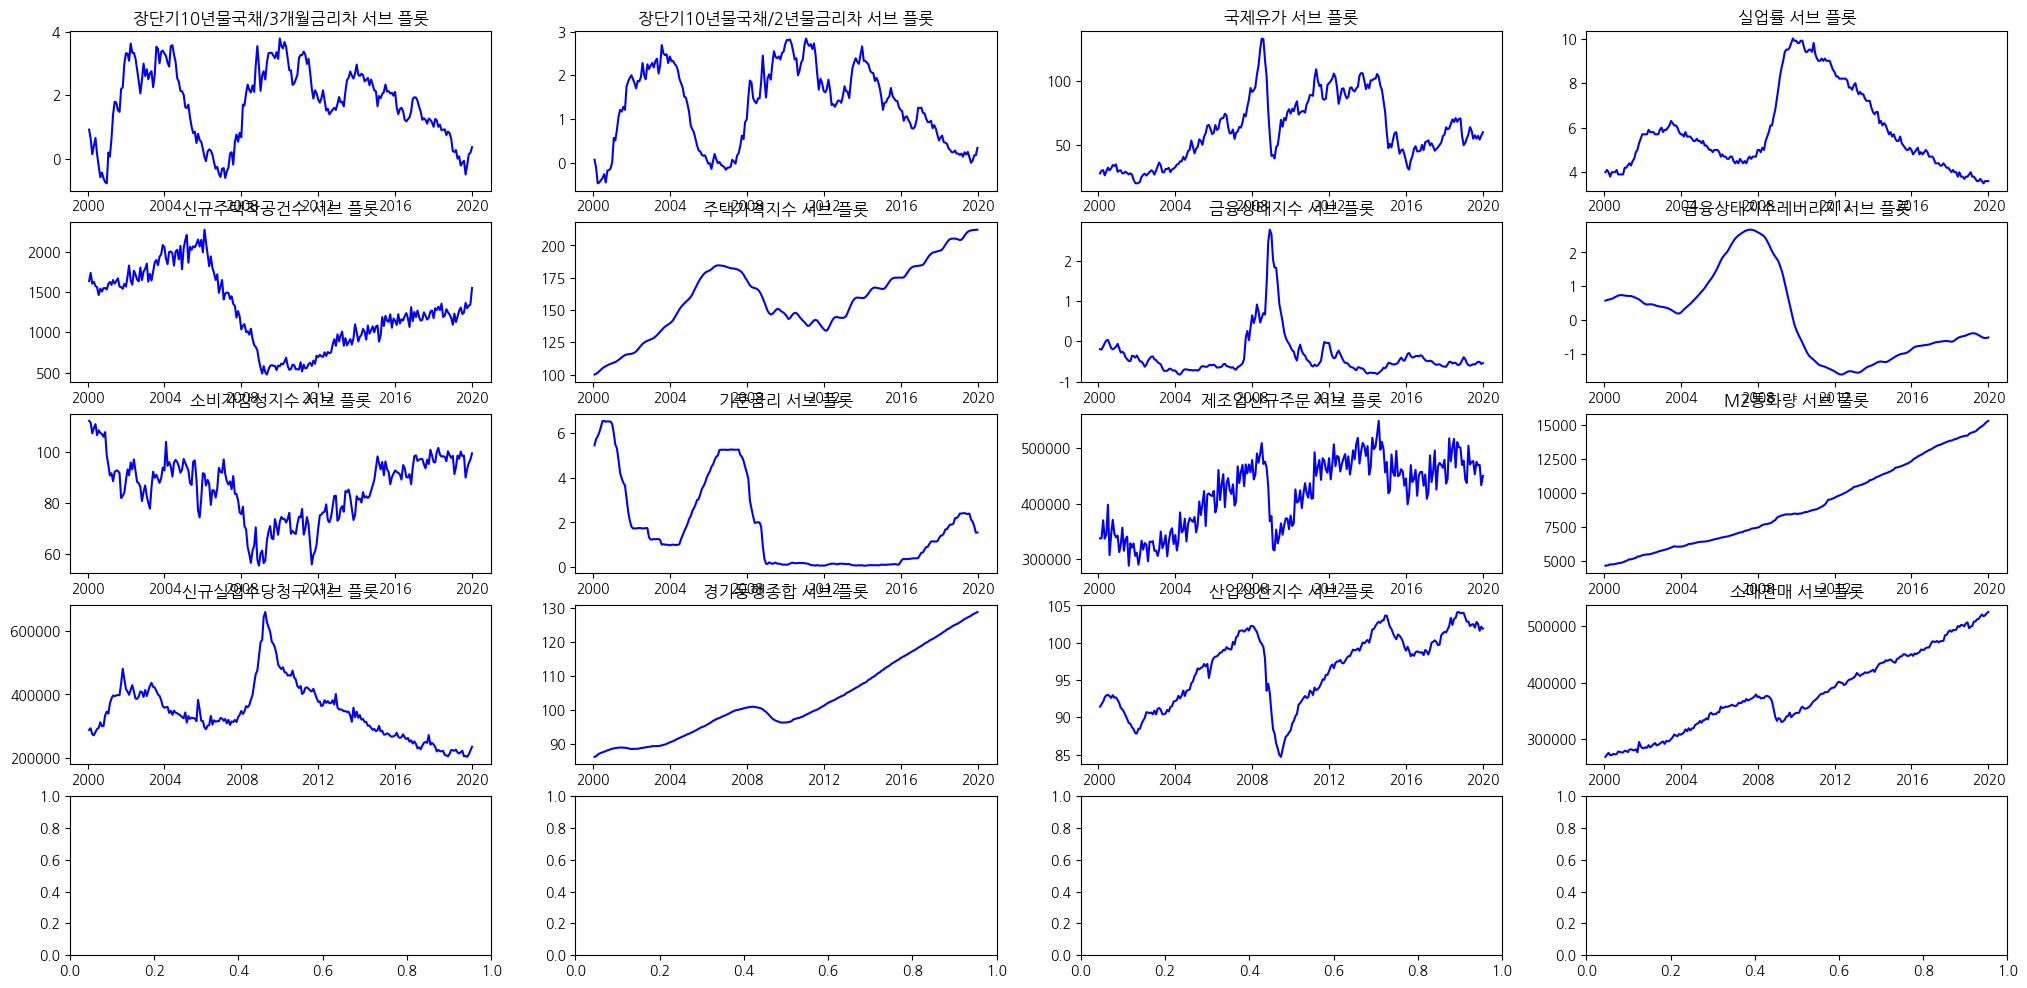

In [7]:
##그래프로 확인

import matplotlib.pyplot as plt

# 그래프 크기 조정
가로, 세로 = 25, 12  # 원하는 크기로 조절
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(가로, 세로))  # 3행 4열의 서브 플롯 생성

# 각 컬럼에 대한 서브 플롯 그리기
for i, col in enumerate(data_.columns[1:]):
    axs[i//4, i%4].plot(data_['DATE'], data_[col], color='blue')
    axs[i//4, i%4].set_title(f'{col} 서브 플롯')

# 그래프 출력
plt.show()

In [8]:
# 차분을 통한 변화율 계산
data_['주택가격지수']= data_['주택가격지수'].diff().fillna(method='bfill')
data_.tail()

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매
235,2019-08-31,-0.49,0.00,54.81,3.60,1367.00,0.36,-0.54,-0.50,89.80,2.13,475564.00,14914.60,206800.00,127.81,102.78,521011.00
236,2019-09-30,-0.20,0.05,56.95,3.50,1300.00,0.18,-0.51,-0.52,93.20,2.04,469232.00,15008.10,203750.00,128.20,102.53,518121.00
237,2019-10-31,0.15,0.17,53.96,3.60,1332.00,0.09,-0.51,-0.53,95.50,1.83,470324.00,15140.80,211750.00,128.41,101.60,519530.00
238,2019-11-30,0.19,0.17,57.05,3.60,1346.00,0.14,-0.56,-0.52,96.80,1.55,433512.00,15242.20,223400.00,128.67,102.15,523313.00
239,2019-12-31,0.37,0.34,59.82,3.60,1551.00,0.13,-0.54,-0.51,99.30,1.55,450364.00,15320.70,235500.00,128.91,101.88,525405.00


In [9]:
data_['M2통화량차분'] = data_['M2통화량'].diff().fillna(method='bfill')
data_['소매판매차분'] = data_['소매판매'].diff().fillna(method='bfill')
data_.head()

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매,M2통화량차분,소매판매차분
0,2000-01-31,0.92,0.07,27.26,4.00,1636.00,0.57,-0.19,0.58,112.00,5.45,337504.00,4666.20,288400.00,86.22,91.43,268044.00,13.20,3976.00
1,2000-02-29,0.64,-0.11,29.37,4.10,1737.00,0.57,-0.20,0.59,111.30,5.73,337504.00,4679.40,293750.00,86.42,91.74,272020.00,13.20,3976.00
2,2000-03-31,0.15,-0.47,29.84,4.00,1604.00,0.89,-0.13,0.61,107.10,5.85,370003.00,4710.20,274750.00,86.85,92.09,275192.00,30.80,3172.00
3,2000-04-30,0.41,-0.45,25.72,3.80,1626.00,1.07,-0.04,0.62,109.20,6.02,336901.00,4766.10,271600.00,87.19,92.68,271046.00,55.90,-4146.00
4,2000-05-31,0.66,-0.40,28.79,4.00,1575.00,1.16,0.02,0.63,110.70,6.27,344615.00,4753.90,282250.00,87.38,92.94,271394.00,-12.20,348.00


In [10]:
data_['M2변화율'] = data_.M2통화량차분/ (data_.M2통화량.shift(1)) * 100
data_['소매판매변화율'] = data_.소매판매차분/ (data_.소매판매.shift(1)) * 100
data_

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,...,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매,M2통화량차분,소매판매차분,M2변화율,소매판매변화율
0,2000-01-31,0.92,0.07,27.26,4.00,1636.00,0.57,-0.19,0.58,112.00,...,337504.00,4666.20,288400.00,86.22,91.43,268044.00,13.20,3976.00,NaN,NaN
1,2000-02-29,0.64,-0.11,29.37,4.10,1737.00,0.57,-0.20,0.59,111.30,...,337504.00,4679.40,293750.00,86.42,91.74,272020.00,13.20,3976.00,0.28,1.48
2,2000-03-31,0.15,-0.47,29.84,4.00,1604.00,0.89,-0.13,0.61,107.10,...,370003.00,4710.20,274750.00,86.85,92.09,275192.00,30.80,3172.00,0.66,1.17
3,2000-04-30,0.41,-0.45,25.72,3.80,1626.00,1.07,-0.04,0.62,109.20,...,336901.00,4766.10,271600.00,87.19,92.68,271046.00,55.90,-4146.00,1.19,-1.51
4,2000-05-31,0.66,-0.40,28.79,4.00,1575.00,1.16,0.02,0.63,110.70,...,344615.00,4753.90,282250.00,87.38,92.94,271394.00,-12.20,348.00,-0.26,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2019-08-31,-0.49,0.00,54.81,3.60,1367.00,0.36,-0.54,-0.50,89.80,...,475564.00,14914.60,206800.00,127.81,102.78,521011.00,74.00,3464.00,0.50,0.67
236,2019-09-30,-0.20,0.05,56.95,3.50,1300.00,0.18,-0.51,-0.52,93.20,...,469232.00,15008.10,203750.00,128.20,102.53,518121.00,93.50,-2890.00,0.63,-0.55
237,2019-10-31,0.15,0.17,53.96,3.60,1332.00,0.09,-0.51,-0.53,95.50,...,470324.00,15140.80,211750.00,128.41,101.60,519530.00,132.70,1409.00,0.88,0.27
238,2019-11-30,0.19,0.17,57.05,3.60,1346.00,0.14,-0.56,-0.52,96.80,...,433512.00,15242.20,223400.00,128.67,102.15,523313.00,101.40,3783.00,0.67,0.73


In [11]:
data_['M2변화율'] = data_['M2변화율'].fillna(method = 'bfill')
data_['소매판매변화율'] = data_['소매판매변화율'].fillna(method = 'bfill')
data_.head()

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,...,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매,M2통화량차분,소매판매차분,M2변화율,소매판매변화율
0,2000-01-31,0.92,0.07,27.26,4.00,1636.00,0.57,-0.19,0.58,112.00,...,337504.00,4666.20,288400.00,86.22,91.43,268044.00,13.20,3976.00,0.28,1.48
1,2000-02-29,0.64,-0.11,29.37,4.10,1737.00,0.57,-0.20,0.59,111.30,...,337504.00,4679.40,293750.00,86.42,91.74,272020.00,13.20,3976.00,0.28,1.48
2,2000-03-31,0.15,-0.47,29.84,4.00,1604.00,0.89,-0.13,0.61,107.10,...,370003.00,4710.20,274750.00,86.85,92.09,275192.00,30.80,3172.00,0.66,1.17
3,2000-04-30,0.41,-0.45,25.72,3.80,1626.00,1.07,-0.04,0.62,109.20,...,336901.00,4766.10,271600.00,87.19,92.68,271046.00,55.90,-4146.00,1.19,-1.51
4,2000-05-31,0.66,-0.40,28.79,4.00,1575.00,1.16,0.02,0.63,110.70,...,344615.00,4753.90,282250.00,87.38,92.94,271394.00,-12.20,348.00,-0.26,0.13


In [12]:
data_ = data_.set_index('DATE')
data_.head()

,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매,M2통화량차분,소매판매차분,M2변화율,소매판매변화율
DATE,,,,,,,,,,,,,,,,,,,,
2000-01-31,0.92,0.07,27.26,4.00,1636.00,0.57,-0.19,0.58,112.00,5.45,337504.00,4666.20,288400.00,86.22,91.43,268044.00,13.20,3976.00,0.28,1.48
2000-02-29,0.64,-0.11,29.37,4.10,1737.00,0.57,-0.20,0.59,111.30,5.73,337504.00,4679.40,293750.00,86.42,91.74,272020.00,13.20,3976.00,0.28,1.48
2000-03-31,0.15,-0.47,29.84,4.00,1604.00,0.89,-0.13,0.61,107.10,5.85,370003.00,4710.20,274750.00,86.85,92.09,275192.00,30.80,3172.00,0.66,1.17
2000-04-30,0.41,-0.45,25.72,3.80,1626.00,1.07,-0.04,0.62,109.20,6.02,336901.00,4766.10,271600.00,87.19,92.68,271046.00,55.90,-4146.00,1.19,-1.51
2000-05-31,0.66,-0.40,28.79,4.00,1575.00,1.16,0.02,0.63,110.70,6.27,344615.00,4753.90,282250.00,87.38,92.94,271394.00,-12.20,348.00,-0.26,0.13


In [29]:
data_.columns

Index(['장단기10년물국채/3개월금리차', '장단기10년물국채/2년물금리차', '국제유가', '실업률', '신규주택착공건수',
       '주택가격지수', '금융상태지수', '금융상태지수레버리지', '소비자감성지수', '기준금리', '제조업신규주문', 'M2통화량',
       '신규실업수당청구', '경기동행종합', '산업생산지수', '소매판매', 'M2통화량차분', '소매판매차분', 'M2변화율',
       '소매판매변화율'],
      dtype='object')

In [13]:
data_.drop(['M2통화량','소매판매', 'M2통화량차분', '소매판매차분'],axis = 1,inplace = True)
data_

,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,신규실업수당청구,경기동행종합,산업생산지수,M2변화율,소매판매변화율
DATE,,,,,,,,,,,,,,,,
2000-01-31,0.92,0.07,27.26,4.00,1636.00,0.57,-0.19,0.58,112.00,5.45,337504.00,288400.00,86.22,91.43,0.28,1.48
2000-02-29,0.64,-0.11,29.37,4.10,1737.00,0.57,-0.20,0.59,111.30,5.73,337504.00,293750.00,86.42,91.74,0.28,1.48
2000-03-31,0.15,-0.47,29.84,4.00,1604.00,0.89,-0.13,0.61,107.10,5.85,370003.00,274750.00,86.85,92.09,0.66,1.17
2000-04-30,0.41,-0.45,25.72,3.80,1626.00,1.07,-0.04,0.62,109.20,6.02,336901.00,271600.00,87.19,92.68,1.19,-1.51
2000-05-31,0.66,-0.40,28.79,4.00,1575.00,1.16,0.02,0.63,110.70,6.27,344615.00,282250.00,87.38,92.94,-0.26,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,-0.49,0.00,54.81,3.60,1367.00,0.36,-0.54,-0.50,89.80,2.13,475564.00,206800.00,127.81,102.78,0.50,0.67
2019-09-30,-0.20,0.05,56.95,3.50,1300.00,0.18,-0.51,-0.52,93.20,2.04,469232.00,203750.00,128.20,102.53,0.63,-0.55
2019-10-31,0.15,0.17,53.96,3.60,1332.00,0.09,-0.51,-0.53,95.50,1.83,470324.00,211750.00,128.41,101.60,0.88,0.27


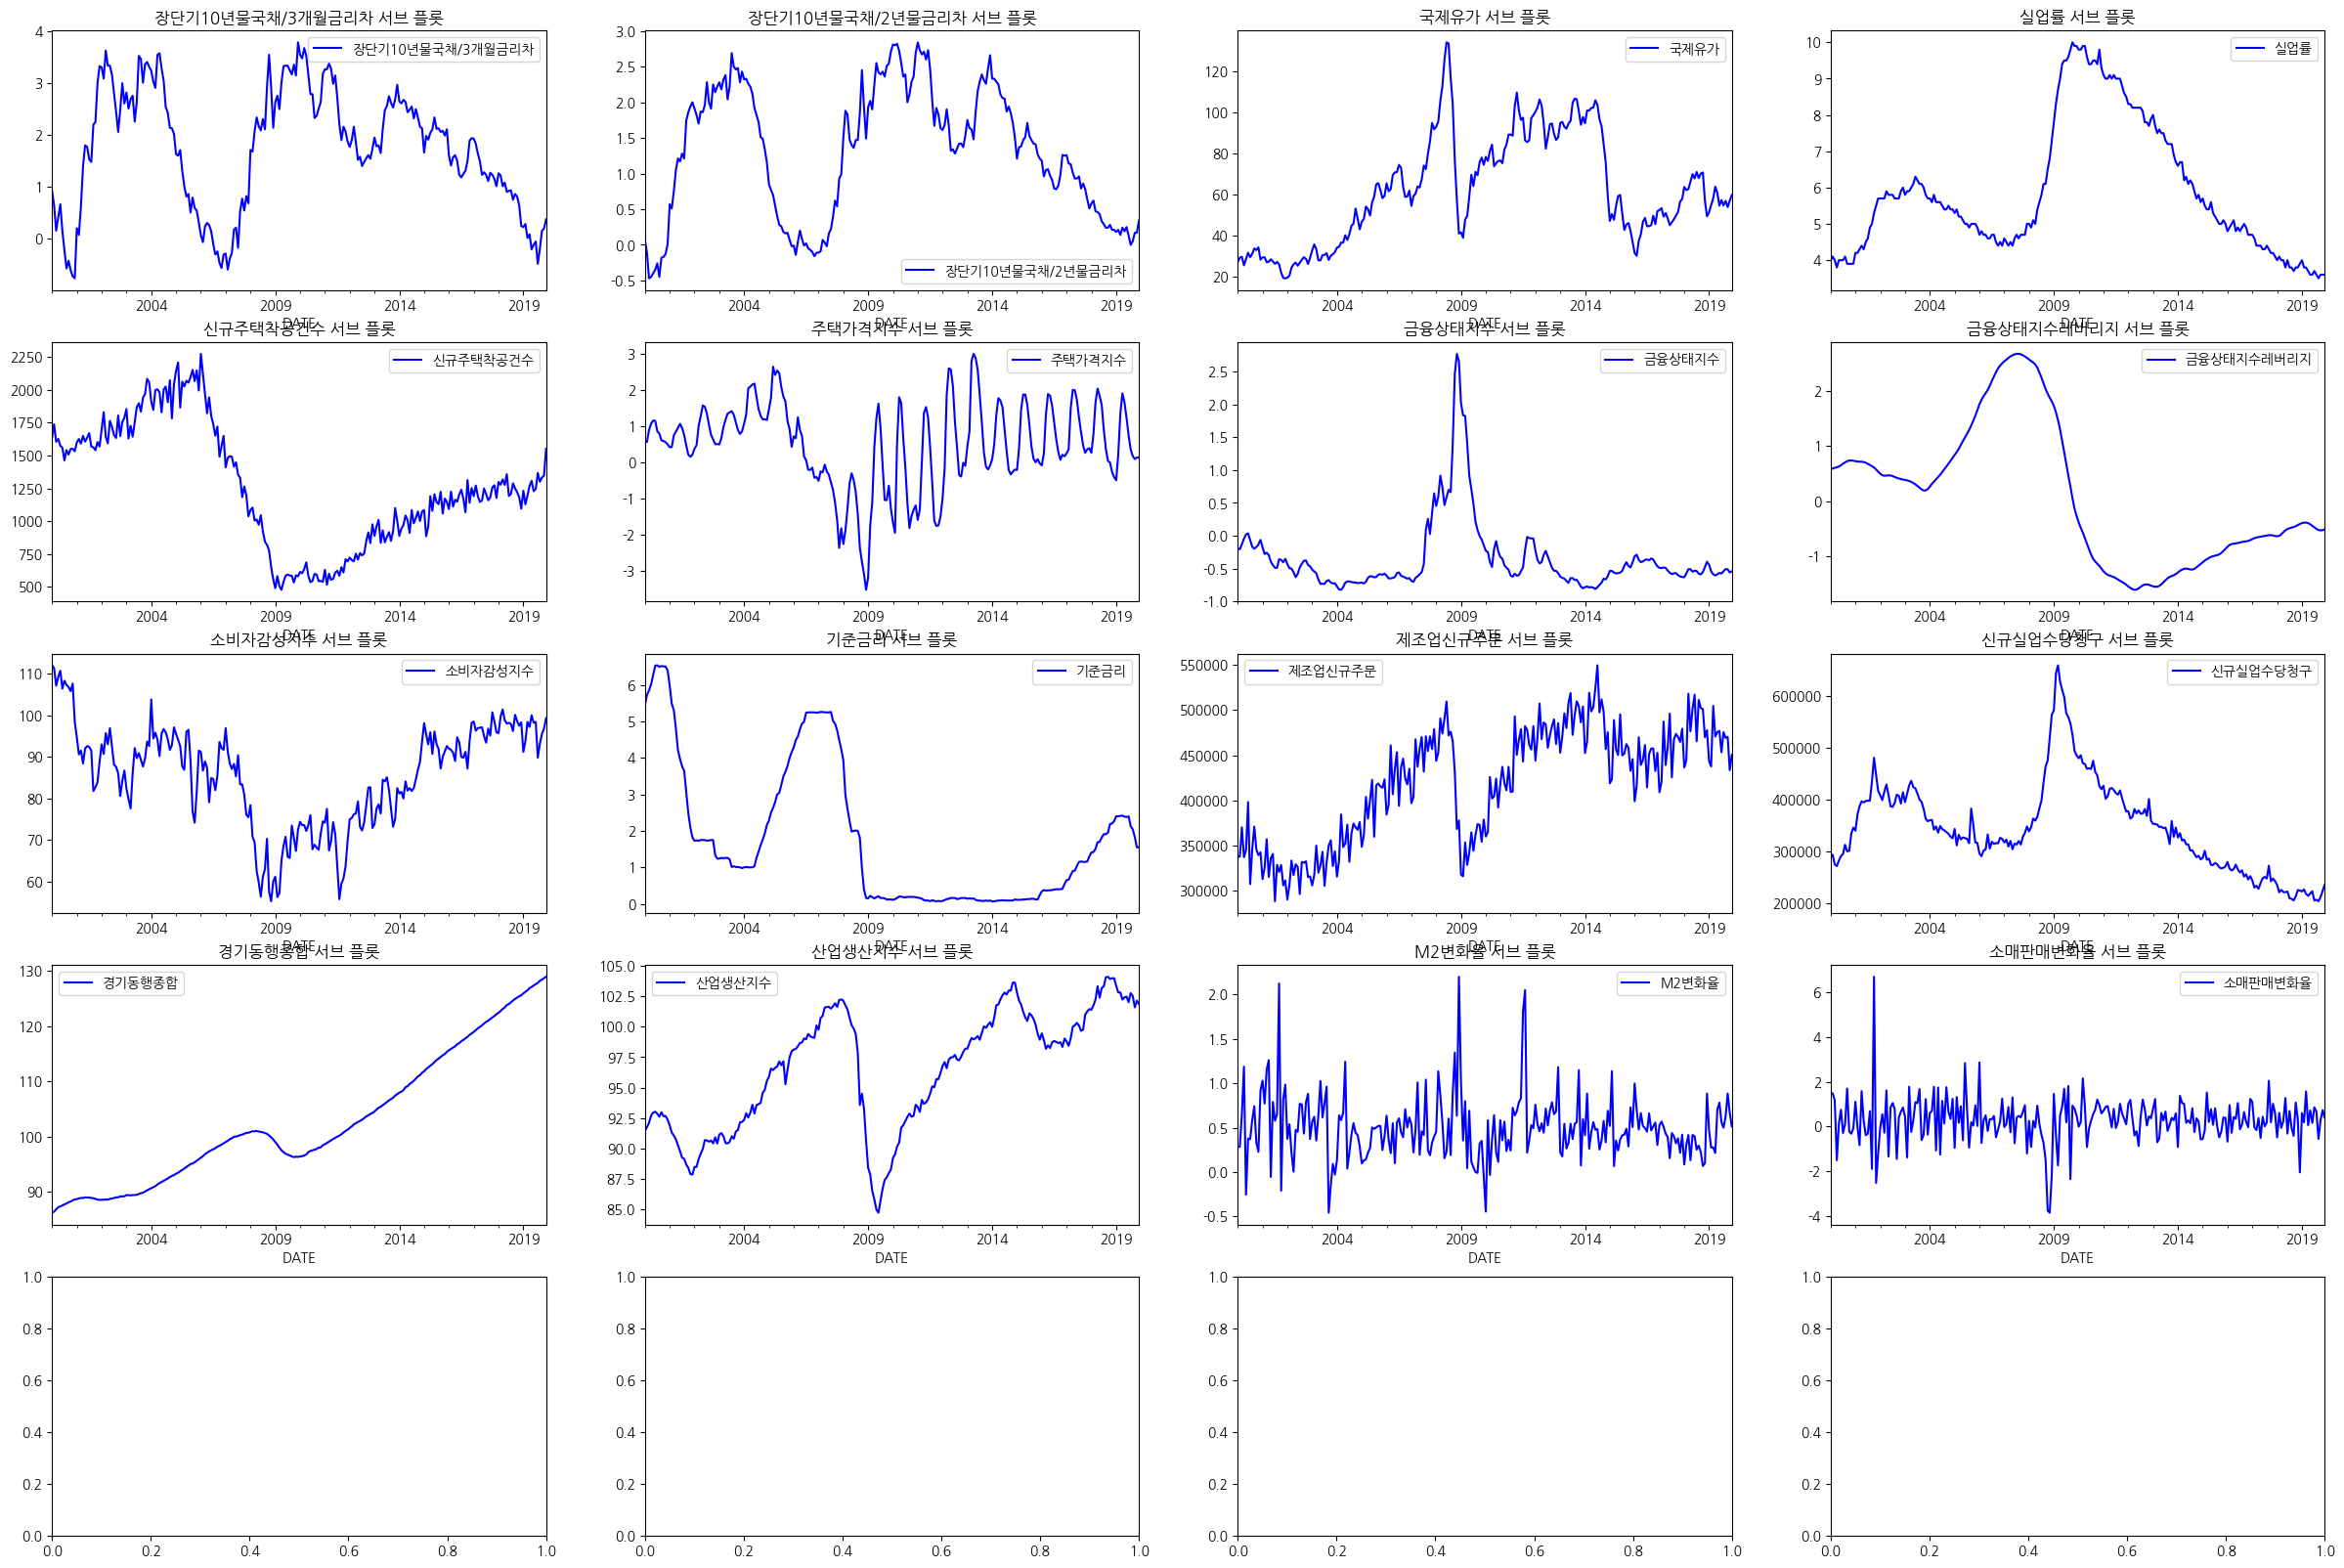

In [14]:
# 그래프 크기 조정
plt.rc('font', family='NanumGothic')
가로, 세로 = 30, 20  # 원하는 크기로 조절
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(가로, 세로))  # 3행 4열의 서브 플롯 생성
# 각 컬럼에 대한 서브 플롯 그리기
for i, col in enumerate(data_.columns):
    data_.plot(y= col, kind='line', ax=axs[i//4, i%4], color='blue')
    axs[i//4, i%4].set_title(f'{col} 서브 플롯')

# 그래프 출력
plt.show()

#### 스케일링(scaling)
    - Standard Scaling 시도

In [15]:

# scikit-learn 패키지의 StandardScaler 클래스를 불러옵니다.
from sklearn.preprocessing import StandardScaler
# StandardScaler 객체를 생성합니다.
standard_scaler = StandardScaler()
# fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
st_scaled_data = standard_scaler.fit_transform(data_)
# 표준화가 완료된 데이터를 데이터프레임 형태로 변환합니다.
st_scaled_data = pd.DataFrame(st_scaled_data,
                              index=data_.index,
                              columns=data_.columns)
# 표준화가 잘 되었는지 데이터를 확인해봅시다.
st_scaled_data.head()

,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,신규실업수당청구,경기동행종합,산업생산지수,M2변화율,소매판매변화율
DATE,,,,,,,,,,,,,,,,
2000-01-31,-0.70,-1.36,-1.32,-1.04,0.79,0.08,0.27,0.39,2.14,1.92,-1.29,-0.65,-1.38,-1.02,-0.60,1.18
2000-02-29,-0.94,-1.56,-1.24,-0.99,1.01,0.08,0.25,0.40,2.09,2.06,-1.29,-0.59,-1.37,-0.96,-0.60,1.18
2000-03-31,-1.36,-1.95,-1.22,-1.04,0.73,0.36,0.38,0.41,1.74,2.13,-0.78,-0.80,-1.33,-0.89,0.45,0.87
2000-04-30,-1.14,-1.93,-1.38,-1.15,0.77,0.51,0.54,0.42,1.91,2.21,-1.30,-0.84,-1.30,-0.77,1.93,-1.78
2000-05-31,-0.93,-1.87,-1.26,-1.04,0.66,0.58,0.65,0.43,2.04,2.34,-1.18,-0.72,-1.29,-0.72,-2.11,-0.16


#### Min-Max Scaling

In [16]:
# #### Min-Max Scaling
# from sklearn.preprocessing import MinMaxScaler

# mMscaler = MinMaxScaler()
# mMscaler.fit(data_)

# # 데이터 변환
# mMscaled_data = mMscaler.transform(data_)

# # 데이터 프레임으로 저장
# mMscaled_data = pd.DataFrame(data_)

In [17]:
st_scaled_data.tail()

,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,신규실업수당청구,경기동행종합,산업생산지수,M2변화율,소매판매변화율
DATE,,,,,,,,,,,,,,,,
2019-08-31,-1.91,-1.44,-0.27,-1.26,0.22,-0.09,-0.35,-0.47,0.33,0.18,0.89,-1.57,2.09,1.29,0.00,0.37
2019-09-30,-1.66,-1.38,-0.18,-1.32,0.07,-0.25,-0.29,-0.48,0.61,0.13,0.79,-1.60,2.13,1.24,0.36,-0.84
2019-10-31,-1.36,-1.25,-0.30,-1.26,0.14,-0.32,-0.30,-0.49,0.79,0.02,0.81,-1.51,2.14,1.05,1.08,-0.02
2019-11-30,-1.33,-1.25,-0.18,-1.26,0.17,-0.28,-0.38,-0.49,0.90,-0.12,0.23,-1.38,2.17,1.16,0.48,0.43
2019-12-31,-1.17,-1.06,-0.07,-1.26,0.61,-0.28,-0.35,-0.47,1.11,-0.12,0.49,-1.25,2.19,1.10,0.05,0.11


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px

#### 엘보우 계수 확인

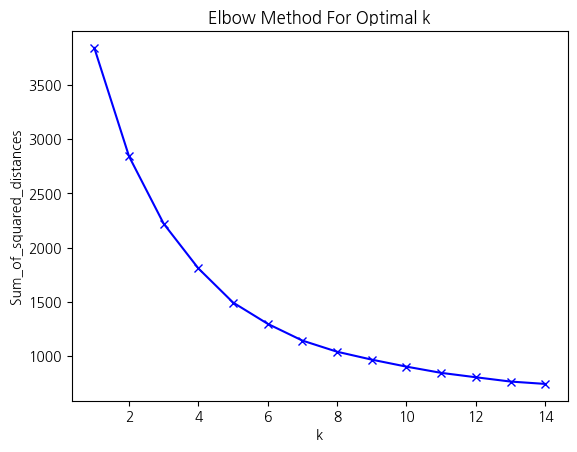

In [19]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(st_scaled_data) # 데이터프레임 입력
    sum_of_squared_distances.append(km.inertia_)

# 시각화

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### 실루엣 계수 확인하기

In [20]:

from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(st_scaled_data)#데이터프레임
  clusters = kmeans.predict(st_scaled_data)#데이터프레임입력

  score = silhouette_score(st_scaled_data, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.2778487261759513
k : 3 score : 0.2807972941176912
k : 4 score : 0.3185570630388183
k : 5 score : 0.34983678840342447
k : 6 score : 0.3576285545773766
k : 7 score : 0.36004286777453237
k : 8 score : 0.3531434536169816
k : 9 score : 0.32653247955589426
k : 10 score : 0.3175438061329495
k : 11 score : 0.2907605999708697
k : 12 score : 0.29640228354414994
k : 13 score : 0.2666426763436461
best n : 7 best score : 0.36004286777453237


- Standard Scaler
- 최적 개수는 7개로 나왔지만
- cluster 4개로 지정

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np

# KMeans
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=300, random_state=200)
kmeans.fit(st_scaled_data)

# 데이터 프레임에 cluster 추가
st_scaled_data["cluster"] = kmeans.labels_

# 개별 데이터 실루엣 계수
score_samples = silhouette_samples(st_scaled_data, st_scaled_data.cluster)
print(f'silhouette_samples( ) return 값의 shape: {score_samples.shape}')

# 데이터 프레임에 실루엣 계수 추가
st_scaled_data['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수
average_score = silhouette_score(st_scaled_data, st_scaled_data.cluster)
print(f'경제데이터 Silhouette Analysis Score: {average_score:.3f}')

silhouette_samples( ) return 값의 shape: (240,)
경제데이터 Silhouette Analysis Score: 0.312


In [24]:
st_scaled_data.groupby("cluster").mean()[["silhouette_coeff"]]

,silhouette_coeff
cluster,
0,0.54
1,0.21
2,0.32
3,0.18


In [25]:
## 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [26]:
def visualize_silhouette_sklearn(range_n_clusters, X):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title('Number of Cluster : '+ str(n_clusters)+'\n' \
                              'Silhouette Score :' + str(round(silhouette_avg,3)))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

TypeError: not all arguments converted during string formatting

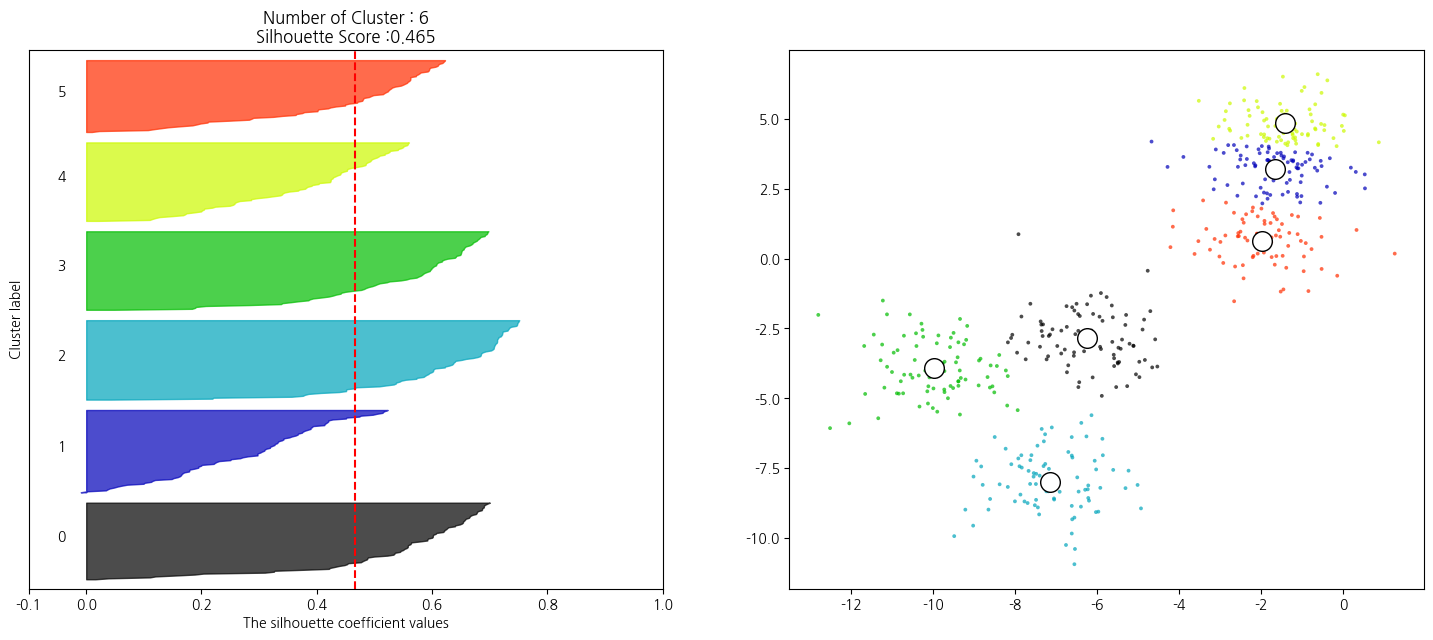

In [132]:
# 가상데이터: 피처 2개, 클러스터 6개
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=6, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# K-Means K: 6
visualize_silhouette_sklearn([6], X)

In [27]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

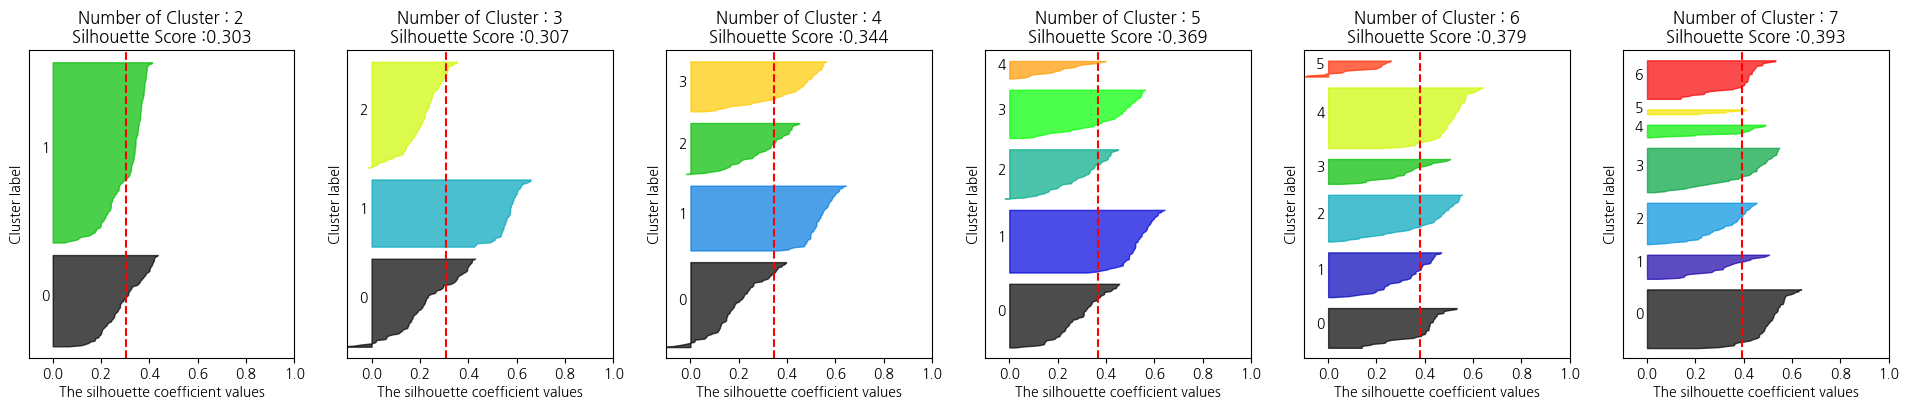

In [28]:
# iris 군집 개수 최적화
visualize_silhouette([ 2, 3, 4, 5,6,7], st_scaled_data)

In [136]:

mMscaled_data[mMscaled_data['cluster']==0]

,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,신규실업수당청구,경기동행종합,산업생산지수,M2변화율,소매판매변화율,cluster,silhouette_coeff
DATE,,,,,,,,,,,,,,,,,,
2014-11-30,2.16,1.71,75.79,5.80,1001.00,-0.25,-0.66,-1.16,88.80,0.09,456721.00,291600.00,111.11,103.64,0.34,0.23,0,0.05
2014-12-31,2.13,1.50,59.29,5.60,1073.00,-0.20,-0.61,-1.13,93.60,0.12,475395.00,284500.00,111.56,103.63,0.69,-0.57,0,0.15
2015-03-31,1.91,1.38,47.82,5.40,960.00,1.46,-0.56,-1.05,93.00,0.11,489032.00,284000.00,112.51,101.82,0.07,1.52,0,0.08
2015-04-30,2.04,1.47,54.45,5.40,1190.00,1.88,-0.57,-1.02,95.90,0.12,456342.00,286000.00,112.83,101.24,0.35,0.20,0,0.20
2015-05-31,2.11,1.51,59.27,5.60,1079.00,1.88,-0.57,-1.00,90.70,0.12,450137.00,274000.00,113.09,100.78,0.24,0.77,0,0.43
2015-06-30,2.34,1.71,59.82,5.30,1205.00,1.60,-0.56,-0.99,96.10,0.13,495361.00,273750.00,113.49,100.48,0.37,0.08,0,0.24
2015-07-31,2.12,1.53,50.90,5.20,1146.00,1.05,-0.53,-0.98,93.10,0.13,449803.00,277750.00,113.84,101.11,0.41,0.81,0,0.37
2015-08-31,2.13,1.47,42.87,5.10,1130.00,0.44,-0.46,-0.97,91.90,0.14,451784.00,275200.00,114.10,100.94,0.42,0.00,0,0.41
2015-09-30,2.06,1.42,45.48,5.00,1224.00,0.11,-0.40,-0.96,87.20,0.14,462334.00,269500.00,114.41,100.65,0.49,-0.48,0,0.48


In [29]:
a  = st_scaled_data['cluster'].value_counts()
a

cluster
1    97
0    62
2    48
3    33
Name: count, dtype: int64

In [30]:
data_list = list(st_scaled_data['cluster'].value_counts())
for i, j  in enumerate(data_list) :
    print(f'{i}번째 클러스터 개수는 {j}개 입니다')

0번째 클러스터 개수는 97개 입니다
1번째 클러스터 개수는 62개 입니다
2번째 클러스터 개수는 48개 입니다
3번째 클러스터 개수는 33개 입니다


In [41]:
# st_scaled_data.loc[st_scaled_data['cluster'] == 3]

(array([62.,  0.,  0., 97.,  0.,  0., 48.,  0.,  0., 33.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

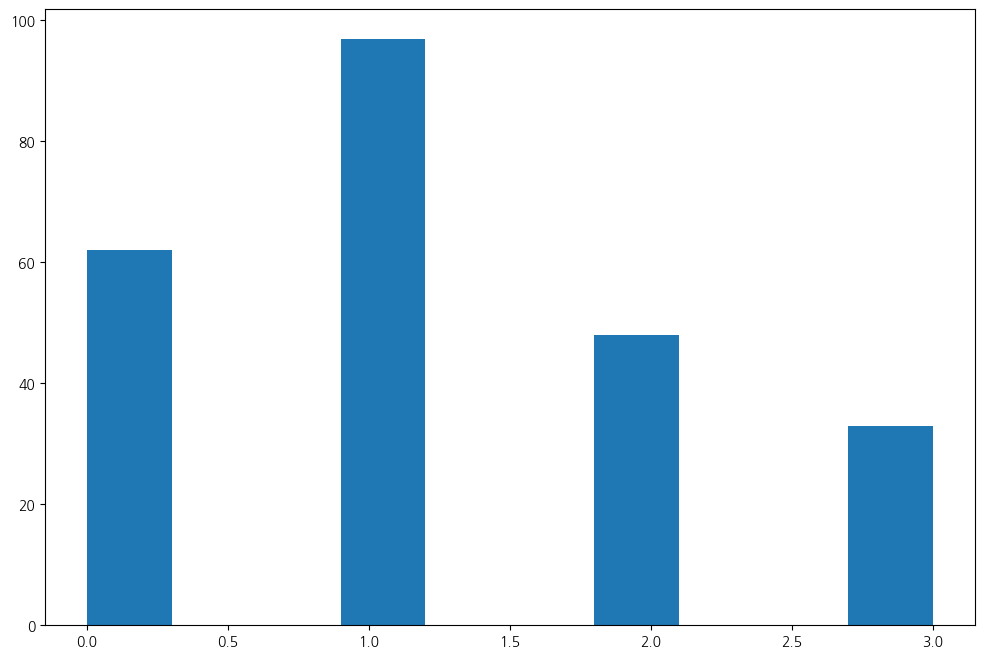

In [39]:
#K군집 클러스터링

plt.figure(figsize=(12,8))
plt.hist(st_scaled_data['cluster'], histtype = 'bar')

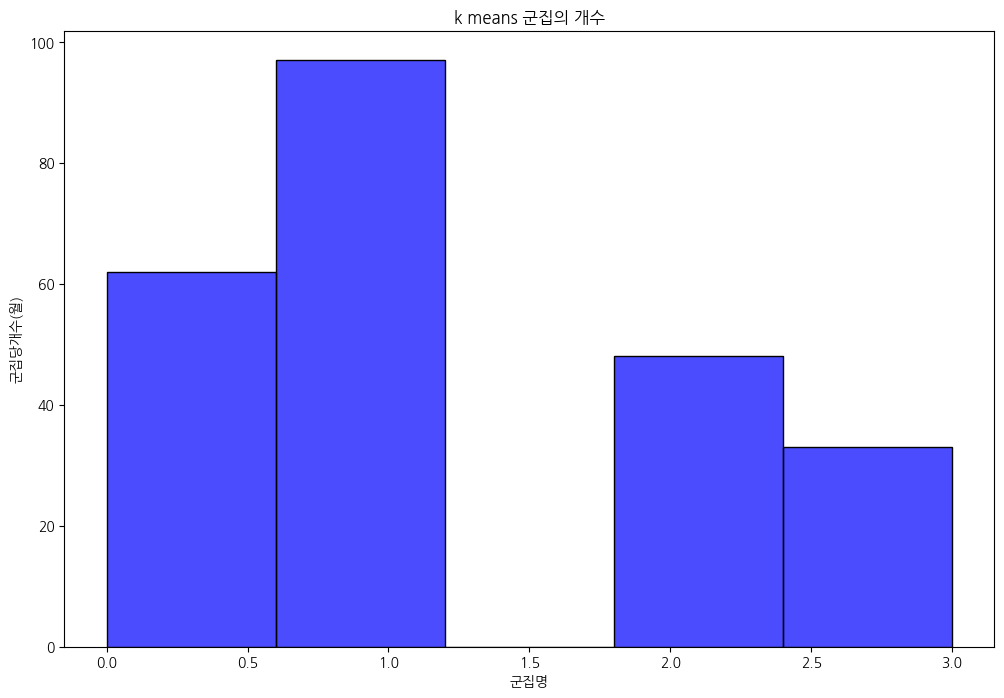

In [43]:
# kmeans 군집화 결과를 시각화하는 코드
import seaborn as sns
# Seaborn 히스토그램 그리기
plt.figure(figsize=(12, 8))
sns.histplot(st_scaled_data['cluster'], bins=5, kde=False, color='blue', alpha=0.7)

# 그래프 제목과 축 레이블 추가
plt.title('k means 군집의 개수')
plt.xlabel('군집명')
plt.ylabel('군집당개수(월)')

# 그래프 보이기
plt.show()

In [35]:
# 대역폭에 따라 군집의 개수는 큰 영향을 받으므로 최적의 대역폭을 찾는 것이 중요하다.
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(st_scaled_data)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 4.882


In [59]:
from sklearn.cluster import MeanShift
from sklearn.model_selection import train_test_split

# X, y = train_test_split(mMscaled_data, test_size=0.3, random_state=0)

# Mean Shift
meanshift = MeanShift(bandwidth=5)
cluster_labels = meanshift.fit_predict(st_scaled_data)

print(f"Mean Shift Cluster 유형: {np.unique(cluster_labels)}")

Mean Shift Cluster 유형: [0 1]


In [37]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [46]:
import pandas as pd

# 데이터 프레임 생성
mMscaled_data = pd.DataFrame(data=cluster_labels.reshape(-1, 1), columns=['ftr1'])
mMscaled_data["meanshift_label"] = cluster_labels

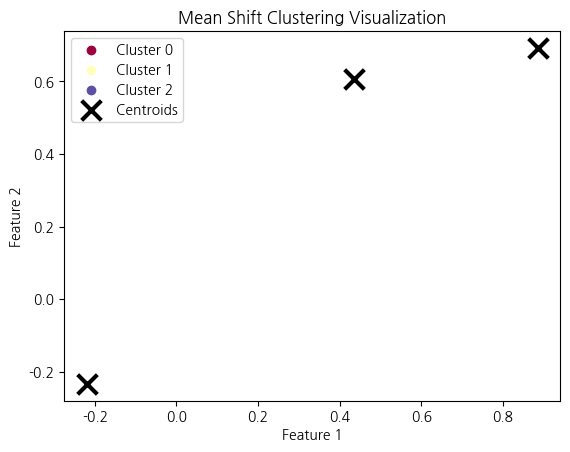

In [48]:
import matplotlib.pyplot as plt

# 시각화를 위해 X와 cluster_labels를 합침
cluster_df = pd.DataFrame(data=st_scaled_data, columns=['ftr1', 'ftr2'])
cluster_df['meanshift_label'] = cluster_labels

# 각 클러스터를 고유한 색으로 표시하기 위한 color map 생성
colors = plt.cm.Spectral(np.linspace(0, 1, len(np.unique(cluster_labels))))

# 각 클러스터에 대한 산점도 그리기
for cluster_label, color in zip(np.unique(cluster_labels), colors):
    cluster_sub_df = cluster_df[cluster_df['meanshift_label'] == cluster_label]
    plt.scatter(cluster_sub_df['ftr1'], cluster_sub_df['ftr2'], c=[color], label=f'Cluster {cluster_label}')

# 클러스터 중심 표시 (선택적)
cluster_centers = meanshift.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3, color='black', label='Centroids')

plt.title('Mean Shift Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


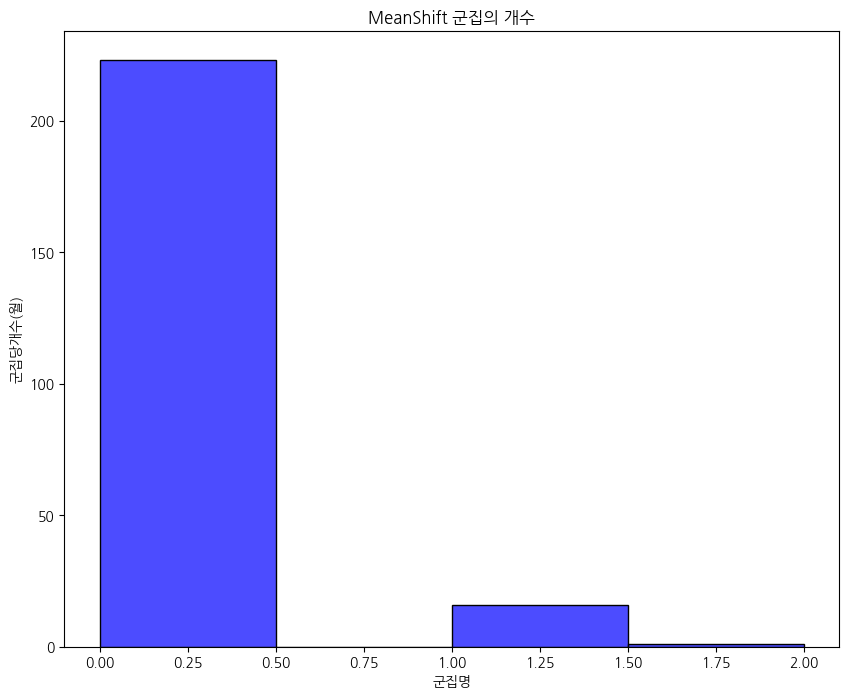

In [56]:
# meanshift 군집화 결과를 시각화하는 코드
import seaborn as sns
# Seaborn 히스토그램 그리기
plt.figure(figsize=(10, 8))
sns.histplot(cluster_labels, bins=4, kde=False, color='blue', alpha=0.7)

# 그래프 제목과 축 레이블 추가
plt.title('MeanShift 군집의 개수')
plt.xlabel('군집명')
plt.ylabel('군집당개수(월)')

# 그래프 보이기
plt.show()